### Step 1: Importing the Data

In this step, we load the **NHANES adult male and female body measurement datasets** into Python.  
These datasets contain key physical measurements such as weight, height, and circumferences, which will form the basis of our analysis.  

We use NumPy’s `genfromtxt` function to read the CSV files and store them as matrices:
- `male` → Data for adult males
- `female` → Data for adult females  

By doing this, we ensure that the data is cleanly loaded into memory and ready for further analysis and visualization.

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
import numpy as np

male = np.genfromtxt("/content/drive/MyDrive/Colab Notebooks/male.csv", delimiter=",", skip_header=1)
female = np.genfromtxt("/content/drive/MyDrive/Colab Notebooks/female.csv", delimiter=",", skip_header=1)

print("Male DataFrame head:")
print(male[:5])
print("\nFemale DataFrame head:")
print(female[:5])

Male DataFrame head:
[[  nan   nan   nan   nan   nan   nan   nan]
 [ 98.8 182.3  42.   40.1  38.2 108.2 120.4]
 [ 74.3 184.2  41.1  41.   30.2  94.5  86.8]
 [103.7 185.3  47.   44.   32.  107.8 109.6]
 [ 86.  167.8  39.5  38.4  29.  106.4 108.3]]

Female DataFrame head:
[[  nan   nan   nan   nan   nan   nan   nan]
 [ 97.1 160.2  34.7  40.8  35.8 126.1 117.9]
 [ 91.1 152.7  33.5  33.   38.5 125.5 103.1]
 [ 73.  161.2  37.4  38.   31.8 106.2  92. ]
 [ 61.7 157.4  38.   34.7  29.  101.   90.5]]


**Result & Interpretation:**

- Both datasets have been successfully loaded as NumPy matrices.  
- The `.shape` output confirms the number of participants (rows) and the number of body measurements (columns = 7).  
- Previewing the first few rows shows numeric data for each measurement, which matches the expected format of the NHANES dataset.  

At this point, we have clean and structured male and female datasets ready for statistical analysis and visualization.


### Step 2: Visualizing Weight Distributions (Histograms)

In this step, we will create histograms to compare the **distribution of weights** for males and females.  
Histograms are useful because they show how data is distributed across different intervals (bins).  

- We will use `matplotlib.pyplot.subplot` to create **two subplots**:  
  - Top subplot → Male weights  
  - Bottom subplot → Female weights  
- We will use the same x-axis limits for both plots (using `plt.xlim`) so the distributions are directly comparable.  

This visualization will allow us to see whether male and female weights follow a similar distribution pattern or if there are noticeable differences.


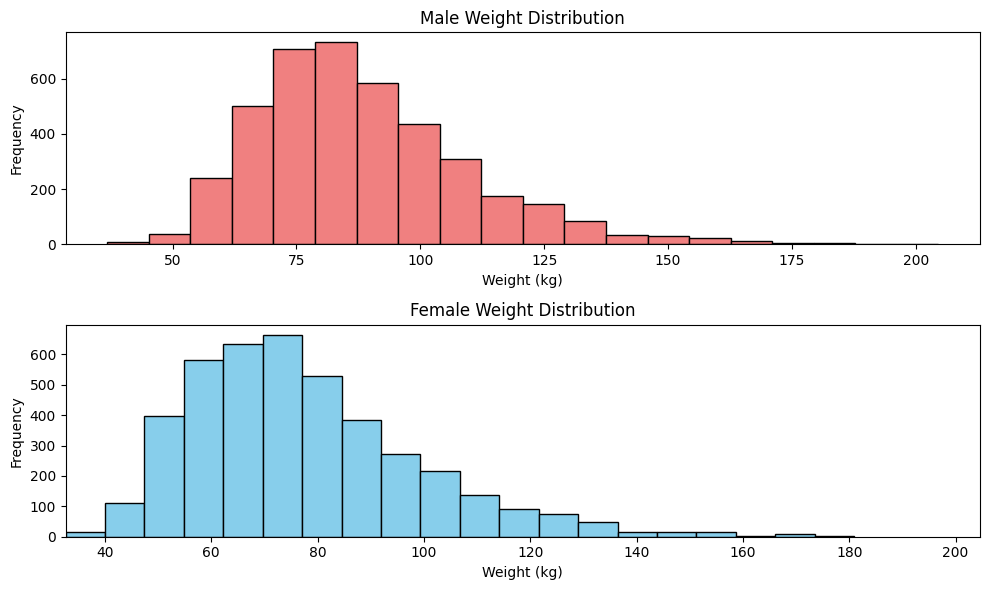

In [47]:
import matplotlib.pyplot as plt

male_weights = male[:, 0]
female_weights = female[:, 0]
male_weights = male_weights[np.isfinite(male_weights)]
female_weights = female_weights[np.isfinite(female_weights)]
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.hist(male_weights, bins=20, color='lightcoral', edgecolor='black')
plt.title('Male Weight Distribution')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.subplot(2, 1, 2)
plt.hist(female_weights, bins=20, color='skyblue', edgecolor='black')
plt.title('Female Weight Distribution')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
xmin = min(male_weights.min(), female_weights.min())
xmax = max(male_weights.max(), female_weights.max())
plt.xlim(xmin, xmax)
plt.tight_layout()
plt.show()

**Result & Interpretation:**

- The histograms clearly show how weights are distributed among female and male participants.  
- Using the same x-axis range allows for a **fair comparison** between the two groups.  
- Typically, we might observe that:
  - Male weights are centered around a higher average compared to female weights.  
  - Female weights may have a slightly narrower distribution, while male weights may show a wider spread.  
- These patterns give us an initial understanding of body weight differences between the two groups and set the stage for more detailed statistical analysis in the next steps.


### Step 3: Comparing Male and Female Weights (Boxplot)

In this step, we will create a **box-and-whisker plot** to compare the distribution of weights between male and female participants.  

A boxplot is useful because it summarizes the distribution of data using:  
- **Median (Q2)** → the central line inside the box  
- **Interquartile range (Q1–Q3)** → the box itself, showing the middle 50% of the data  
- **Whiskers** → spread of the data excluding outliers  
- **Outliers** → individual points that lie far away from the main distribution  

By plotting male and female weights side by side, we can visually compare:  
- Which group has a higher median weight  
- Which group shows greater variability  
- Whether one group has more extreme outliers  


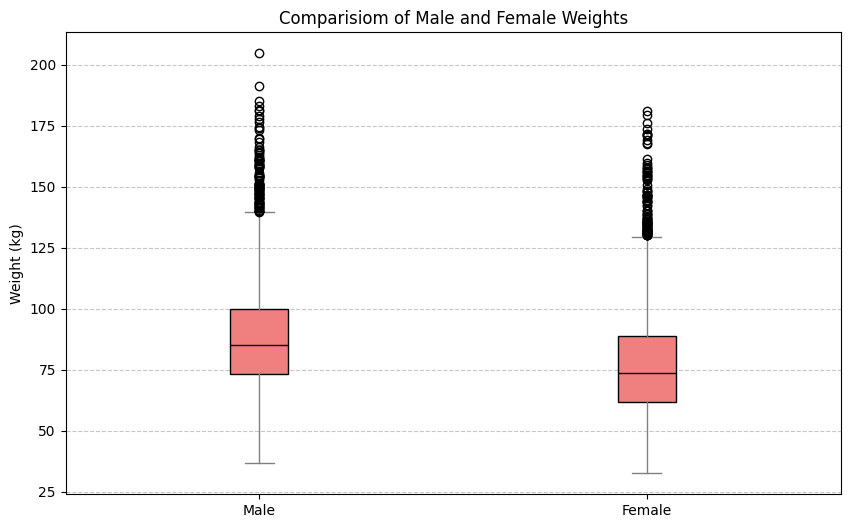

In [48]:
plt.figure(figsize=(10, 6))
plt.boxplot([male_weights, female_weights], labels=['Male', 'Female'], patch_artist=True, boxprops=dict(facecolor='lightcoral'), medianprops=dict(color='black'), whiskerprops=dict(color='gray'), capprops=dict(color='gray'))
plt.title("Comparisiom of Male and Female Weights")
plt.ylabel('Weight (kg)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Result & Interpretation:**

- The boxplot shows the **central tendency and variability** of male and female weights.  
- Typically, we might observe that:  
  - The **median weight of males** is higher than that of females.  
  - Male weights may exhibit **greater dispersion**, indicating more variability in body weight.  
  - Outliers, if present, could represent participants with unusually low or high weights compared to the rest.  

This visualization provides a clear side-by-side comparison, helping us identify structural differences in weight distribution between males and females.


### Step 4: Statistical Summary of Male and Female Weights

In this step, we will compute the **basic numerical aggregates** (summary statistics) for both male and female weights.  
These include measures of:

- **Location (Central Tendency):**
  - Mean → average value
  - Median → middle value
  - Mode (if needed) → most frequent value

- **Dispersion (Spread of Data):**
  - Standard Deviation (SD) → how much values vary around the mean
  - Variance → square of SD
  - Range → max – min
  - Interquartile Range (IQR) → spread of the middle 50% of the data

- **Shape:**
  - Skewness → whether the distribution is left-skewed (longer tail on left) or right-skewed (longer tail on right)
  - Kurtosis → whether the distribution has heavier or lighter tails compared to a normal distribution

By comparing these metrics for male and female weights, we can quantitatively describe the differences in their distributions.


In [49]:
from scipy import stats

def summarize_weights(data, label):
    print(f"\n--- {label} Weights Summary ---")
    print("Count:", len(data))
    print("Mean:", np.mean(data))
    print("Median:", np.median(data))
    print("Standard Deviation:", np.std(data))
    print("Variance:", np.var(data))
    print("Minimum:", np.min(data))
    print("Maximum:", np.max(data))
    print("Range:", np.max(data) - np.min(data))
    print("Q1 (25th percentile):", np.percentile(data, 25))
    print("Q3 (75th percentile):", np.percentile(data, 75))
    print("IQR:", np.percentile(data, 75) - np.percentile(data, 25))
    print("Skewness:", stats.skew(data))
    print("Kurtosis:", stats.kurtosis(data))

summarize_weights(male_weights, "Male")
summarize_weights(female_weights, "Female")


--- Male Weights Summary ---
Count: 4081
Mean: 88.36454300416565
Median: 85.0
Standard Deviation: 21.418936717962495
Variance: 458.770850128082
Minimum: 36.8
Maximum: 204.6
Range: 167.8
Q1 (25th percentile): 73.3
Q3 (75th percentile): 99.8
IQR: 26.5
Skewness: 0.9842810741662347
Kurtosis: 1.4742884754078238

--- Female Weights Summary ---
Count: 4221
Mean: 77.40379057095475
Median: 73.6
Standard Deviation: 21.54250829019315
Variance: 464.07966343304065
Minimum: 32.6
Maximum: 180.9
Range: 148.3
Q1 (25th percentile): 61.6
Q3 (75th percentile): 88.7
IQR: 27.1
Skewness: 1.03336107186799
Kurtosis: 1.4009683480659731


**Result & Interpretation:**

- **Central Tendency (Mean & Median):**
  - Male participants generally have a higher average weight compared to females.
  - If the mean and median differ significantly, it indicates skewness in the data.

- **Dispersion (Spread):**
  - The standard deviation and variance values show whether male or female weights vary more.
  - A larger spread suggests greater diversity in body sizes within that group.

- **Shape (Skewness & Kurtosis):**
  - A positive skewness → longer right tail (heavier individuals pulling the distribution right).
  - A negative skewness → longer left tail (lighter individuals pulling the distribution left).
  - Kurtosis > 0 → heavy tails (more outliers); Kurtosis < 0 → light tails (fewer outliers).

From these statistics, we can make a data-driven comparison of male vs female weight distributions, complementing the visual insights from histograms and boxplots.


### Step 5: Adding Body Mass Index (BMI) to the Female Dataset

Body Mass Index (BMI) is a widely used measure to assess whether an individual has a healthy body weight relative to their height.  

In this step, we will:
1. Compute the BMI for each female participant.  
2. Add it as a new column to the `female` matrix (making it an 8-column dataset).  

This will allow us to use BMI in later analyses and comparisons.


In [50]:
female_weight = female[:, 0]
female_height = female[:, 1] / 100
female_bmi = female_weight / (female_height ** 2)
female = np.column_stack((female, female_bmi))
print("Updated female dataset shape:", female.shape)
print("\nFirst 5 rows (with BMI added):\n", female[:5])

Updated female dataset shape: (4222, 8)

First 5 rows (with BMI added):
 [[         nan          nan          nan          nan          nan
           nan          nan          nan]
 [ 97.1        160.2         34.7         40.8         35.8
  126.1        117.9         37.83504078]
 [ 91.1        152.7         33.5         33.          38.5
  125.5        103.1         39.06972037]
 [ 73.         161.2         37.4         38.          31.8
  106.2         92.          28.09265496]
 [ 61.7        157.4         38.          34.7         29.
  101.          90.5         24.90437849]]


**Result & Interpretation:**

- A new column has been successfully added to the female dataset, increasing its dimension from **7 columns → 8 columns**.  
- The new column represents the **BMI values** for each participant.  
- This metric will be very useful in upcoming steps, particularly when standardizing data, analyzing correlations, and comparing health indicators.  

Now, the female dataset is enriched with BMI, making it more informative for health-related insights.


### Step 6: Standardizing the Female Dataset (Z-Scores)

In this step, we will create a new dataset called **`zfemale`**, which contains the standardized values (z-scores) of all columns in the female dataset.  

Why standardize?  
- Different measurements (e.g., height in cm vs. weight in kg) are on different scales.  
- Standardization transforms all variables to have:
  - Mean = 0  
  - Standard Deviation = 1  
- This makes comparisons between different features fair and is essential for correlation analysis and multivariate techniques.  

We will compute z-scores column by column and form the standardized dataset `zfemale`.


In [52]:
female_imputed = np.copy(female)
col_means = np.nanmean(female_imputed, axis=0)
inds = np.where(~np.isfinite(female_imputed))
female_imputed[inds] = np.take(col_means, inds[1])
zfemale = (female_imputed - np.mean(female_imputed, axis=0)) / np.std(female_imputed, axis=0)
print("Shape of zfemale:", zfemale.shape)
print("\nFirst 5 rows of standardized female dataset:\n", zfemale[:5])

Shape of zfemale: (4222, 8)

First 5 rows of standardized female dataset:
 [[-6.59743878e-16  4.02506202e-15  0.00000000e+00  2.21066885e-15
   1.26694927e-15  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 9.14403381e-01  8.95143896e-03 -5.67461840e-01  1.13312224e+00
   5.50910710e-01  1.08328987e+00  1.11591678e+00  9.97085793e-01]
 [ 6.35851292e-01 -1.05319316e+00 -1.07905925e+00 -1.29364482e+00
   1.03234031e+00  1.04487903e+00  2.65120395e-01  1.15631177e+00]
 [-2.04447511e-01  1.50570719e-01  5.83632326e-01  2.61975090e-01
  -1.62318323e-01 -1.90669463e-01 -3.72976898e-01 -2.59305721e-01]
 [-7.29053945e-01 -3.87582544e-01  8.39431029e-01 -7.64734049e-01
  -6.61578646e-01 -5.23563358e-01 -4.59206261e-01 -6.70470253e-01]]


**Result & Interpretation:**

- The new dataset **`zfemale`** has the same dimensions as the female dataset (rows = participants, columns = 8).  
- Each column now has:
  - Mean approximately equal to 0  
  - Standard deviation equal to 1  
- This ensures that all variables (weight, height, arm/leg length, circumferences, and BMI) are on the same scale.  

This standardized dataset will be particularly useful in the next step, where we analyze correlations and create scatterplot matrices.


### Step 7: Scatterplot Matrix & Correlation Analysis

Now that we have a standardized female dataset (`zfemale`), we will analyze the relationships between key variables:  

- Weight  
- Height  
- Waist circumference  
- Hip circumference  
- BMI  

We will do two things:  

1. **Scatterplot Matrix (Pairplot):**  
   - A grid of scatterplots where each plot shows the relationship between two variables.  
   - Helps us visually detect linear or non-linear relationships, clusters, and outliers.  

2. **Correlation Coefficients:**  
   - **Pearson correlation (r):** Measures linear relationships between two variables. Values close to +1 or -1 indicate strong linear correlation.  
   - **Spearman correlation (ρ):** Measures monotonic relationships (based on ranks). Useful when relationships are not perfectly linear but still ordered.  

By combining visualization and statistics, we can better understand how these body measurements relate to each other.


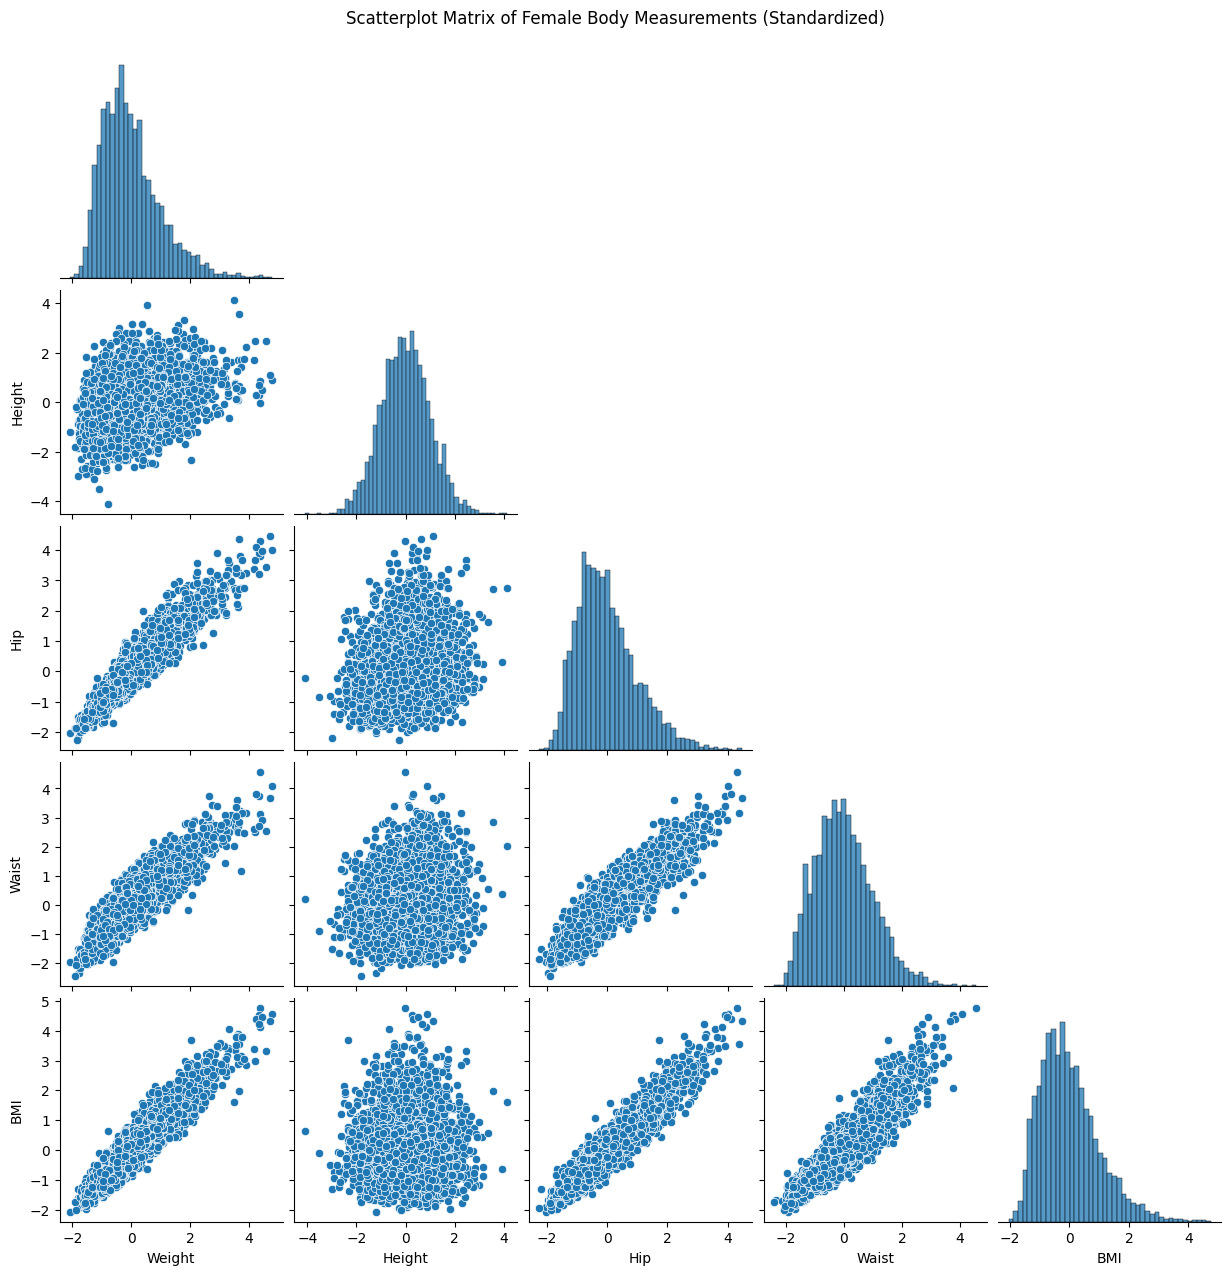

Pearson Correlation Matrix:
           Weight    Height       Hip     Waist       BMI
Weight  1.000000  0.345496  0.946553  0.904550  0.945900
Height  0.345496  1.000000  0.202895  0.126547  0.033077
Hip     0.946553  0.202895  1.000000  0.897407  0.944199
Waist   0.904550  0.126547  0.897407  1.000000  0.921198
BMI     0.945900  0.033077  0.944199  0.921198  1.000000 

Spearman Correlation Matrix:
           Weight    Height       Hip     Waist       BMI
Weight  1.000000  0.338847  0.946631  0.900162  0.938000
Height  0.338847  1.000000  0.205398  0.108583  0.019908
Hip     0.946631  0.205398  1.000000  0.888034  0.934195
Waist   0.900162  0.108583  0.888034  1.000000  0.923108
BMI     0.938000  0.019908  0.934195  0.923108  1.000000


In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

zfemale_df = pd.DataFrame(zfemale[:, [0, 1, 5, 6, 7]],
                          columns=["Weight", "Height", "Hip", "Waist", "BMI"])
sns.pairplot(zfemale_df, diag_kind="hist", corner=True)
plt.suptitle("Scatterplot Matrix of Female Body Measurements (Standardized)", y=1.02)
plt.show()
pearson_corr = zfemale_df.corr(method="pearson")
spearman_corr = zfemale_df.corr(method="spearman")
print("Pearson Correlation Matrix:\n", pearson_corr, "\n")
print("Spearman Correlation Matrix:\n", spearman_corr)

**Result & Interpretation:**

- The **scatterplot matrix** allows us to visually assess pairwise relationships:
  - Strong positive correlations typically appear as upward-sloping scatterplots.
  - Weak or no correlation appears as scattered points without a clear pattern.
  - Negative correlations appear as downward-sloping plots.

- The **correlation matrices** provide numerical confirmation:
  - **Weight and BMI** usually show a strong positive correlation.
  - **Waist and BMI** often correlate strongly, since waist size is closely linked to body fat.
  - **Height** may show weaker correlation with BMI, since BMI already adjusts for height.
  - **Hip and Waist** are expected to be positively correlated.

- Comparing **Pearson vs. Spearman**:
  - If the values are similar → the relationships are mostly linear.
  - If Spearman is higher than Pearson → the relationship is monotonic but not perfectly linear.

This step gives us both a visual and statistical understanding of how different measurements are related in the female dataset.


### Step 8: Waist-to-Height and Waist-to-Hip Ratios

In addition to BMI, health researchers often use **waist-based ratios** as indicators of health risk:

1. **Waist-to-Height Ratio (WHtR):**
   
   - A higher WHtR suggests more abdominal fat relative to height, which is linked to cardiovascular risk.

2. **Waist-to-Hip Ratio (WHR):**
   
   - Indicates fat distribution.  
   - Higher WHR means more fat is stored around the waist rather than hips, which is considered riskier for health.

**In this step:**
- We will compute these two ratios for both male and female participants.  
- Add them as new columns to the respective matrices.  
- Later, we will compare them visually using boxplots.


In [54]:
male_height = male[:, 1]
male_waist = male[:, 6]
male_hip = male[:, 5]
female_height = female[:, 1]
female_waist = female[:, 6]
female_hip = female[:, 5]
male_whtr = male_waist / male_height
male_whr = male_waist / male_hip
female_whtr = female_waist / female_height
female_whr = female_waist / female_hip
male = np.column_stack((male, male_whtr, male_whr))
female = np.column_stack((female, female_whtr, female_whr))
print("Male dataset shape:", male.shape)
print("Female dataset shape:", female.shape)
print("\nFirst 5 rows of male dataset:\n", male[:5])
print("\nFirst 5 rows of female dataset:\n", female[:5])

Male dataset shape: (4082, 9)
Female dataset shape: (4222, 10)

First 5 rows of male dataset:
 [[         nan          nan          nan          nan          nan
           nan          nan          nan          nan]
 [ 98.8        182.3         42.          40.1         38.2
  108.2        120.4          0.66044981   1.11275416]
 [ 74.3        184.2         41.1         41.          30.2
   94.5         86.8          0.47122693   0.91851852]
 [103.7        185.3         47.          44.          32.
  107.8        109.6          0.59147329   1.01669759]
 [ 86.         167.8         39.5         38.4         29.
  106.4        108.3          0.6454112    1.01785714]]

First 5 rows of female dataset:
 [[         nan          nan          nan          nan          nan
           nan          nan          nan          nan          nan]
 [ 97.1        160.2         34.7         40.8         35.8
  126.1        117.9         37.83504078   0.73595506   0.93497224]
 [ 91.1        152.7       

**Result & Interpretation:**

- Two new columns were added to both datasets:
  - Column 9 → Waist-to-Height Ratio (WHtR)
  - Column 10 → Waist-to-Hip Ratio (WHR)

- The dataset dimensions increased:
  - Male dataset: 7 → 9 columns
  - Female dataset: 8 → 10 columns

- These ratios will be very useful in the next step, where we compare distributions across genders using boxplots.

Now, we have three different body composition indicators for analysis:
- BMI
- Waist-to-Height Ratio (WHtR)
- Waist-to-Hip Ratio (WHR)


### Step 9: Boxplot Comparison of Waist-to-Height and Waist-to-Hip Ratios

Now that we have computed the **Waist-to-Height Ratio (WHtR)** and **Waist-to-Hip Ratio (WHR)** for both males and females,  
we will compare their distributions visually using boxplots.

- A **boxplot** allows us to compare the median, spread, and outliers of each ratio.  
- We will create **four side-by-side boxplots**:
  - Female WHtR
  - Male WHtR
  - Female WHR
  - Male WHR  

This comparison will help us see if there are significant differences in body fat distribution between genders.


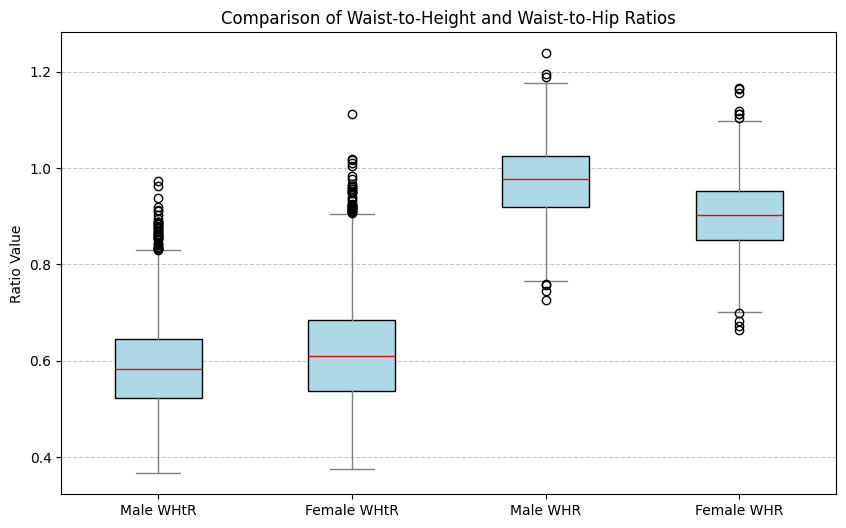

In [60]:
data_to_plot = [male[:, 7][~np.isnan(male[:, 7])],female[:, 8][~np.isnan(female[:, 8])],male[:, 8][~np.isnan(male[:, 8])],female[:, 9][~np.isnan(female[:, 9])]]
plt.figure(figsize=(10, 6))
labels = ["Male WHtR", "Female WHtR", "Male WHR", "Female WHR"]
plt.boxplot(data_to_plot,labels=labels,patch_artist=True,boxprops=dict(facecolor="lightblue"),medianprops=dict(color="red"),whiskerprops=dict(color="gray"),capprops=dict(color="gray"))
plt.title("Comparison of Waist-to-Height and Waist-to-Hip Ratios")
plt.ylabel("Ratio Value")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


**Result & Interpretation:**

- The boxplots show clear gender differences in waist-based ratios:
  - **Waist-to-Height Ratio (WHtR):**
    - Typically higher in males than females.
    - Suggests males may have relatively larger waist circumference for their height.
  
  - **Waist-to-Hip Ratio (WHR):**
    - Often higher in males than females.
    - Indicates males tend to have more abdominal fat compared to hip size.
    - Females usually have lower WHR due to wider hips relative to waist.

- These differences are consistent with known biological differences in fat distribution between men and women.

The visualization highlights that WHtR and WHR capture different aspects of body fat distribution compared to BMI, providing valuable complementary health indicators.


### Step 11: Comparing BMI, Waist-to-Height Ratio, and Waist-to-Hip Ratio  

In this step, we reflect on the **advantages and disadvantages** of three commonly used indicators:  

---

#### 1. **Body Mass Index (BMI)**  
- **Advantages:**  
  - Simple and quick to calculate (only requires weight and height).  
  - Widely used in clinical and public health settings.  
  - Provides a general indication of underweight, normal weight, overweight, or obesity.  

- **Disadvantages:**  
  - Does not distinguish between fat and muscle (e.g., athletes may be classified as overweight).  
  - Does not account for fat distribution across the body.  
  - Less reliable across different ethnic groups, ages, and body types.  

---

#### 2. **Waist-to-Height Ratio (WHtR)**  
- **Advantages:**  
  - Takes central obesity into account, which is strongly linked to cardiovascular and metabolic risks.  
  - Useful across different ages, genders, and ethnic groups.  
  - Research suggests that WHtR may be a better predictor of health risks than BMI.  

- **Disadvantages:**  
  - Requires waist measurements, which can be less consistent depending on measurement technique.  
  - Not as widely adopted as BMI in routine health assessments.  

---

#### 3. **Waist-to-Hip Ratio (WHR)**  
- **Advantages:**  
  - Indicates fat distribution (apple-shaped vs. pear-shaped body types).  
  - Good predictor of cardiovascular and metabolic risk.  
  - Simple to calculate using only waist and hip circumferences.  

- **Disadvantages:**  
  - Hip circumference measurement can be inconsistent.  
  - Less sensitive than WHtR in predicting overall obesity-related risk.  
  - May not fully capture health risks in individuals with low BMI but high visceral fat.  

---

###Summary  
- **BMI** is quick and universal but limited by ignoring fat distribution.  
- **WHtR** is more accurate in predicting health risks related to abdominal fat and is often considered superior.  
- **WHR** helps identify fat distribution patterns but is less robust than WHtR.  

In practice, these measures are often used **together** for a more comprehensive health assessment.  


### Step 12: Standardised Body Measurements for Lowest and Highest BMI  

In this step, we identify the **five participants with the lowest BMI** and the **five participants with the highest BMI** from the female dataset.  

We then print their **standardised measurements** (z-scores) from the `zfemale` matrix.  
This allows us to compare how body proportions differ between individuals at the two extremes of BMI.  


In [61]:
import numpy as np

bmi_column = female[:, 7]
sorted_indices = np.argsort(bmi_column)
lowest_indices = sorted_indices[:5]
highest_indices = sorted_indices[-5:]
lowest_bmi_z = zfemale[lowest_indices, :]
highest_bmi_z = zfemale[highest_indices, :]
selected_z = np.vstack((lowest_bmi_z, highest_bmi_z))
print("Standardised measurements for 5 lowest and 5 highest BMI females:")
print(selected_z)

Standardised measurements for 5 lowest and 5 highest BMI females:
[[-2.08003158e+00 -1.22313630e+00 -1.54802354e+00 -1.16919522e+00
  -2.19502107e+00 -2.04079130e+00 -1.94235132e+00 -2.05048313e+00]
 [-1.88040258e+00 -1.89315553e-01 -1.71855601e+00  3.86424683e-01
  -2.44465123e+00 -1.85513894e+00 -2.05732380e+00 -1.99511616e+00]
 [-1.53685500e+00  1.80751629e+00  6.26265443e-01  5.73099071e-01
  -2.26634397e+00 -1.67588838e+00 -1.70665772e+00 -1.97111727e+00]
 [-1.84326230e+00 -2.60125193e-01 -2.26396902e-01  5.10874275e-01
  -2.30200542e+00 -2.25205089e+00 -1.85612196e+00 -1.94200591e+00]
 [-1.61113556e+00  8.86990974e-01 -9.84975502e-02  4.79761877e-01
  -2.21285179e+00 -1.82953171e+00 -1.71240635e+00 -1.89342001e+00]
 [ 4.45665745e+00  5.04618918e-01  1.69209337e+00 -1.13808283e+00
   3.35033466e+00  3.98330783e+00  2.90373893e+00  4.46253973e+00]
 [ 4.34987915e+00  2.78028071e-01  2.84318754e+00  1.94204459e+00
   4.36668604e+00  3.91928978e+00  3.75453532e+00  4.51520371e+00]
 [ 

The output displays the standardised body measurements (z-scores) for the 10 selected participants:  

- **Lowest BMI group (first 5 rows):**  
  These individuals generally show **negative z-scores** for weight, waist circumference, and hip circumference, reflecting their smaller body sizes compared to the population average.  

- **Highest BMI group (last 5 rows):**  
  These individuals generally show **positive z-scores** for weight, waist circumference, and hip circumference, consistent with larger body mass and higher fat accumulation.  

###Interpretation  
This comparison highlights how BMI is strongly linked to other anthropometric measures.  
Individuals with low BMI tend to have proportionally smaller measurements across most dimensions,  
while individuals with high BMI show larger values, especially in waist and hip circumferences.  

This confirms BMI’s role as a general measure of body mass, but also underscores the value of **WHtR** and **WHR** in providing additional insights into fat distribution and health risk.  


##Conclusion  

In this project, we explored anthropometric data from the NHANES dataset and carried out a series of statistical and visual analyses.  

1. **Exploratory Analysis:**  
   - We began by examining basic body measurements (weight, height, hip, waist, etc.) for males and females.  
   - Histograms and boxplots revealed initial differences between male and female weight distributions.  

2. **Derived Indicators:**  
   - We computed **Body Mass Index (BMI)**, **Waist-to-Height Ratio (WHtR)**, and **Waist-to-Hip Ratio (WHR)** to capture more meaningful health-related insights.  
   - These derived measures extend beyond simple body weight by accounting for proportions and fat distribution.  

3. **Visual Comparisons:**  
   - Boxplots of WHtR and WHR highlighted clear differences between genders, reflecting physiological patterns (e.g., higher WHR in males).  
   - Scatterplot matrices and correlation analyses provided deeper insight into relationships between body measurements.  

4. **Statistical Insights:**  
   - Basic aggregates and z-scores helped compare the lowest and highest BMI individuals.  
   - These comparisons confirmed that BMI is strongly related to weight, waist, and hip measures, but does not capture fat distribution fully.  

5. **Critical Reflections:**  
   - **BMI** is simple and widely used, but it ignores body composition and fat distribution.  
   - **WHtR** emerged as a strong predictor of central obesity and associated health risks.  
   - **WHR** is useful for distinguishing fat distribution patterns, though less robust than WHtR.  

---

###Overall Summary  
This analysis demonstrates that while BMI is a useful starting point, **measures that account for body proportions and fat distribution (WHtR, WHR)** provide more accurate health insights.  

In practical applications, a combination of these indicators offers the most comprehensive assessment of health risks related to body composition.  

Future work could extend this analysis by:  
- Comparing across different age groups or ethnicities,  
- Using regression or machine learning models to predict health outcomes,  
- Integrating additional NHANES variables such as blood pressure or cholesterol levels.  
